In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [13]:
df = pd.read_csv("Titanic-Dataset.csv")
# df.head()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Mean Squared Error: 1554.2993045783344
R-squared: -0.00443941686318694


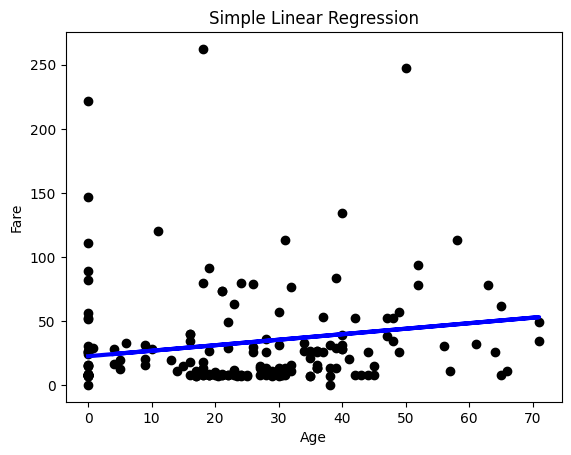

In [10]:
# (L12 – 2 ქულა) გამოიყენეთ ერთ ცვლადიანი რეგრესიის მოდელი (Simple linear Regression). გამოთვალეთ
# მოდელის ეფექტურობა და შეამოწმეთ ახალ მონაცემზე რა შედეგს მოგცემთ.

x = df[['Age']]
y = df['Fare']

# ბაზაში არსებულ მონაცემთა გარკვეული ნაწილი წარმოადგენს NaN(Not a number)ს რის გამოც მას ვავსებ ნულით.
x = x.fillna(0)  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# მოდელში ინიციალიზაცია წრფივი რეგრესიის
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# გამოთვლა mean squared Errorისა და R-squared ის გამოყენებით
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# არსებულისა და წინასწარ გამოთვლილი მონაცემების ვიზუალიზაცია
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.title('Simple Linear Regression')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [12]:
new_data = pd.DataFrame({'Age' : [20,30,40]})
predicted_prices = model.predict(new_data)

print(predicted_prices)

[30.99587827 35.29598108 39.5960839 ]


Mean Squared Error: 1554.2993045783344
R-squared: 1.0


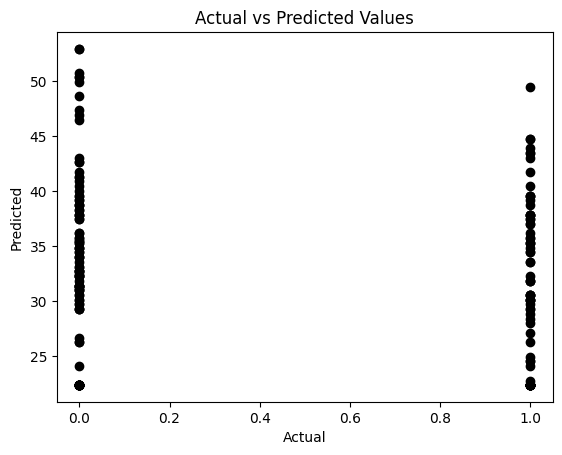

In [16]:
# (L12 – 2 ქულა) გამოიყენეთ მრავალ ცვლადიანი რეგრესიის მოდელი (Multiple linear Regression). გამოთვალეთ

X = df[['Age', 'Fare', 'Pclass', 'SibSp']] 
y = df[["Survived"]]

x = x.fillna(0);
x= y.fillna(0);


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression();
model.fit(x_train,y_train);

y_prediction = model.predict(x_test)

mean_sqr_error = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test, y_prediction)


print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')

plt.scatter(y_test, y_pred, color='black')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()



In [17]:
# (L13 – 3 ქულა) გამოიყენეთ გადაწყვეტილების ხის რეგრესიის მოდელი ერთ ცვლადზე ან რამდენიმე ცვლადზე
# დამოკიდებულებით. გამოთვალეთ მოდელის ეფექტურობა და შეამოწმეთ ახალ მონაცემზე რა შედეგს
# მოგცემთ.

Accuracy: 0.6927374301675978
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       105
           1       0.65      0.57      0.60        74

    accuracy                           0.69       179
   macro avg       0.68      0.67      0.68       179
weighted avg       0.69      0.69      0.69       179



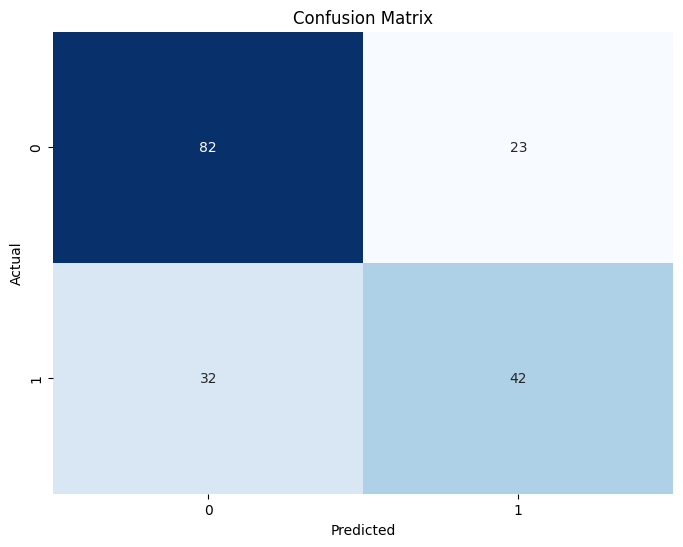

In [26]:
x = df[['Age', 'Fare', 'Pclass']]
y = df['Survived'] 

x = x.fillna(0)
y = y.fillna(0)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy = model.score(x_test, y_test)
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{class_report}')

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

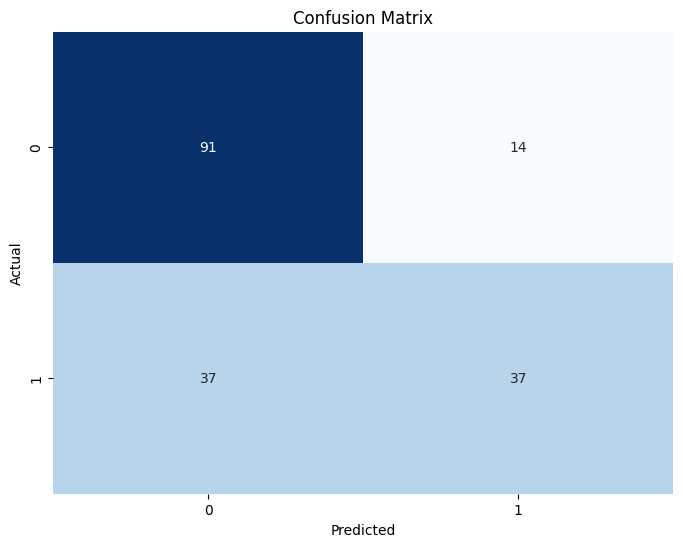

გამოთვლილი ალბათობა new_data (ანუ ახალ dataზე):
 [0.61445493 0.46378617 0.31945092]


In [33]:
# (L14 – 3 ქულა) გამოიყენეთ ლოგისტიკური რეგრესიის მოდელი. გამოთვალეთ მოდელის ეფექტურობა და
# შეამოწმეთ ახალ მონაცემზე რა შედეგს მოგცემთ.


x = df[['Age', 'Fare', 'Pclass']]
y = df['Survived']

# ბაზაში არსებულ მონაცემთა გარკვეული ნაწილი წარმოადგენს NaN(Not a number)ს რის გამოც მას ვავსებ ნულით.
x = x.fillna(0)  
y = y.fillna(0)  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# print(f'Accuracy: {accuracy}')
# print(f'Classification Report:\n{class_report}')

# მატრიცის შეფასება და მისი გამოთვლა
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# მოდელის ახალ data ზე გამოყენება და შემოწმება
new_data = pd.DataFrame({
    'Age': [30, 40, 50],
    'Fare': [50, 100, 150],
    'Pclass': [1, 2, 3]
})

predicted_probabilities = model.predict_proba(new_data)[:, 1]

print("გამოთვლილი ალბათობა new_data (ანუ ახალ dataზე):\n", predicted_probabilities)

C:\Users\lphirtskhalava\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



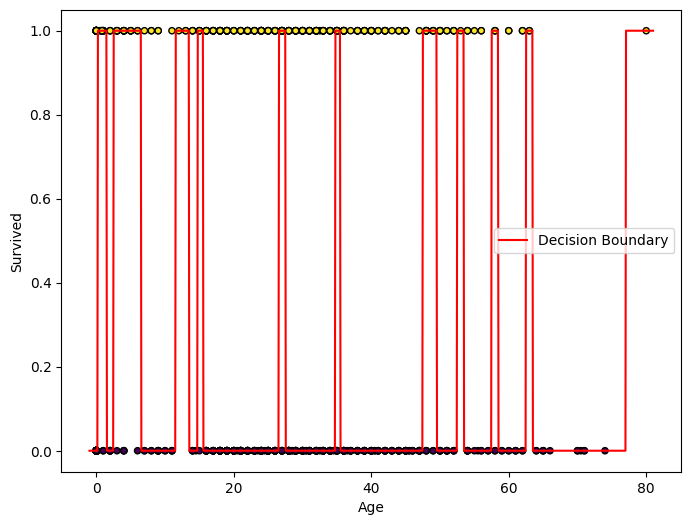

In [45]:

# Selecting a single feature and the target variable
feature_column = 'Age'
target_column = 'Survived'

x = df[[feature_column]]
y = df[target_column]

x = x.fillna(0)  
y = y.fillna(0)  


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(x, y)

# Plotting decision boundaries
x_min, x_max = x.min() - 1, x.max() + 1
x_values = np.linspace(x_min, x_max, 1000).reshape(-1, 1)
y_values = model.predict(x_values)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=y, cmap='viridis', edgecolor='k', s=20)
plt.plot(x_values, y_values, color='red', label='Decision Boundary')
plt.xlabel(feature_column)
plt.ylabel(target_column)
plt.legend()
plt.show()


# შედარებით ნორმალურით ვცდილობდი გამეკეთებინა მარა ვერ გავაკეთე :(
# fig = px.scatter(x=x.iloc[:, 0], y=y, color=y,labels={x.columns[0]: feature_column, y.name: target_column})
# fig.add_scatter(x=x_values[:, 0], y=y_values, mode='lines', name='Decision Boundary')
# fig.update_traces(marker=dict(size=8, line=dict(width=1, color='DarkSlateGrey')),selector=dict(mode='markers'))
# fig.update_layout(title='Decision Boundary for Survival based on Age',xaxis_title=feature_column, yaxis_title=target_column)
# fig.show()